<a href="https://colab.research.google.com/github/nour614/food-sales-prediction/blob/main/Nour_Tafa_Project_Sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####Nour Tafa



Sales Predictions 


1. Loading Data












2.  Data Cleaning



3.  Exploratory Visuals


4.  Explanatory Visuals

In [89]:

import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [58]:
df_salesp = pd.read_csv('/content/sales_predictions.csv')


In [59]:
df_salesp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [60]:
df_salesp.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


1) How many rows and columns?



In [61]:
df_salesp.shape

(8523, 12)

2) What are the datatypes of each variable?



In [62]:
df_salesp.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3) Are there duplicates? If so, drop any duplicates.



In [63]:
duplicates = df_salesp.duplicated()
duplicates




0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [64]:
df_salesp=df_salesp.drop_duplicates()
df_salesp


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


4) Identify missing values.



In [65]:
df_salesp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [66]:
missing=df_salesp.isna().sum()
missing

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).



**replace** the missing numericals with the mean weight (This can introduce bias and is affected by skew and outliers more than the 'median' value)
**replace** the missing categorical outlet size with the('Unknown') its missing 40% of the data( This typically will not create bias in favor of a specific label or class)

In [67]:
mean_weight=df_salesp['Item_Weight'].mean()
mean_weight

12.857645184135976

In [68]:
df_salesp['Item_Weight'].fillna(12.85, inplace=True)


In [69]:
df_salesp['Outlet_Size'].fillna('Unknown', inplace=True)

6) Confirm that there are no missing values after addressing them.



In [70]:
missing=df_salesp.isna().sum()
missing

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).


In [71]:
df_salesp['Item_Fat_Content'].str.lower()

0       low fat
1       regular
2       low fat
3       regular
4       low fat
         ...   
8518    low fat
8519    regular
8520    low fat
8521    regular
8522    low fat
Name: Item_Fat_Content, Length: 8523, dtype: object

In [72]:
df_salesp['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [73]:
df_salesp['Item_Fat_Content'].replace('LF','Low Fat')

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object

In [74]:
df_salesp['Item_Fat_Content'].replace('LOW FAT','Low Fat')

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object

In [95]:
df_salesp['Item_Fat_Content'].replace('reg','Regular')

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [76]:
df_salesp.describe(include="number")

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.856333,0.066132,140.992782,1997.831867,2181.288914
std,4.226125,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.850000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [77]:
stats=df_salesp.describe()
stats


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.856333,0.066132,140.992782,1997.831867,2181.288914
std,4.226125,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.850000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Histogram to view the distributions of various features in your dataset.


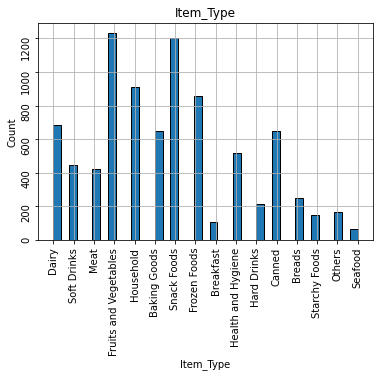

In [78]:
#Item_Type 
ax = df_salesp['Item_Type'].hist(bins='auto', edgecolor='black')
ax.set_xlabel('Item_Type')
ax.set_ylabel('Count')

ax.set_title('Item_Type')

ax.tick_params(rotation = 90)

Fruits and vegetables , snack food have the highest count. seafood and breakfast have the lowest 

In [79]:
weight=df_salesp['Item_Type'].describe()
weight

count                      8523
unique                       16
top       Fruits and Vegetables
freq                       1232
Name: Item_Type, dtype: object

Boxplot to view statistical summaries of various features in your dataset.


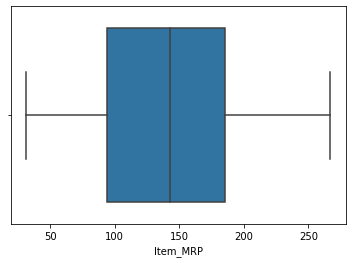

In [80]:
ax = sns.boxplot(x = 'Item_MRP', data = df_salesp)

This boxplot shows that there arent any outliers.

Heatmap of the correlation between features.

In [81]:
corr=df_salesp.corr()


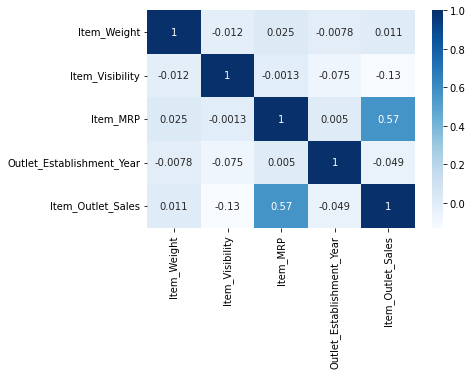

In [82]:

ax = sns.heatmap(corr, cmap= 'Blues', annot = True)
plt.show()



Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).




Does Item visibility effect Item_Outlet_Sales






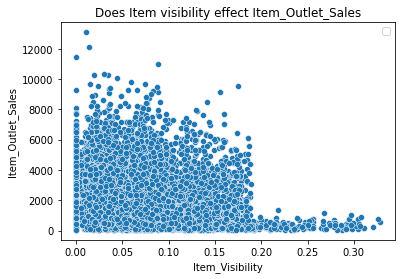

In [105]:
ax = sns.scatterplot(data=df_salesp, x = 'Item_Visibility', y = 'Item_Outlet_Sales')
ax.set_title('Does Item visibility effect Item_Outlet_Sales')
ax.legend(bbox_to_anchor=[1,1]);

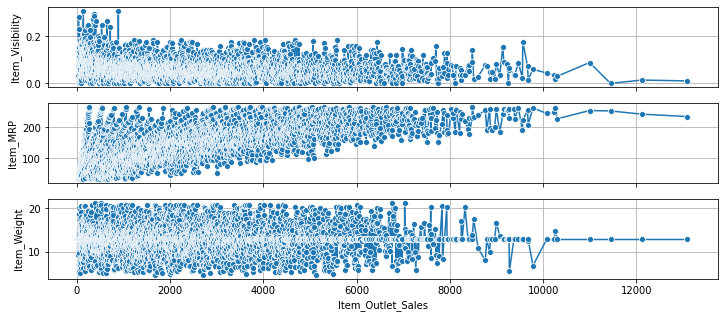

In [110]:
fig, axes = plt.subplots(nrows = 3, figsize = (12,5), sharex = True)

sns.lineplot(data = df_salesp, x = 'Item_Outlet_Sales', y = 'Item_Visibility', ci = None, marker = 'o', ax = axes[0])

sns.lineplot(data = df_salesp, x = 'Item_Outlet_Sales', y = 'Item_MRP', ci = None, marker = 'o', ax = axes[1])

sns.lineplot(data = df_salesp, x ='Item_Outlet_Sales', y = 'Item_Weight', ci = None, marker = 'o', ax = axes[2])

ax.set_title('Does Item visibility,Item_MRP and Item_Weight effect Item_Outlet_Sales')

#list comprehension
[ax.grid() for ax in axes];